In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic.shape

(891, 12)

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Cleaning

<Axes: xlabel='SibSp'>

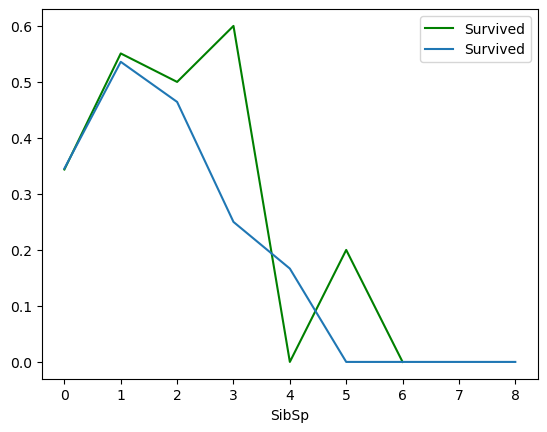

In [5]:
titanic.groupby('Parch')['Survived'].mean().plot(kind = 'line', color='green', legend = True)
titanic.groupby('SibSp')['Survived'].mean().plot(kind = 'line', legend= True)

In [6]:
# This plot proves that the Parch and Subsb is highly correlated to the survival.
# We can merge these columns to make one columns called 'FamilyCount'

In [7]:
titanic['FamilyCount'] = titanic['Parch']  + titanic['SibSp']

In [8]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


<Axes: xlabel='FamilyCount'>

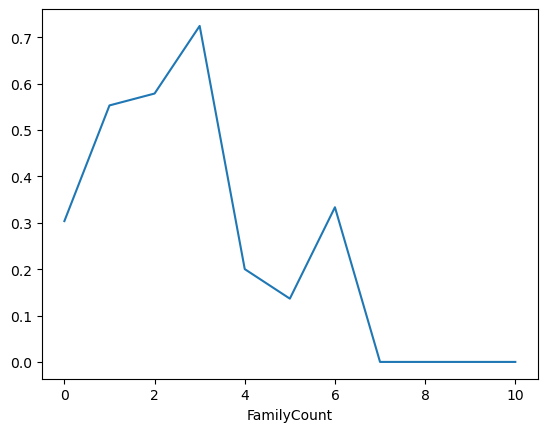

In [9]:
titanic.groupby('FamilyCount')['Survived'].mean().plot(kind = 'line')

In [10]:
#Missing values

In [11]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilyCount      0
dtype: int64

In [12]:
# We'll work on the Age column first

In [13]:
titanic['Age'].isnull().mean()

0.19865319865319866

In [14]:
# Around 19 percent of the values are missing

In [15]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [16]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,0


In [17]:
titanic['Age'] = titanic['Age'].astype(int)

In [18]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,0


In [19]:
titanic.groupby(titanic['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [20]:
# The people with no cabin were less likely to survive

In [21]:
# We can devide the cabin column with only values '0' for no cabin and '1' for cabin

In [22]:
titanic['Cabin'] = np.where(titanic['Cabin'].isnull(), 0, 1)

In [23]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,0,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,1,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,0,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,1,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,0,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,0,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,1,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,0,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,1,C,0


In [24]:
titanic.drop(columns = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Embarked', 'Fare'], axis =1, inplace = True)

In [25]:
gender = {'male': 0, 'female': 1}
titanic['Sex'] = titanic['Sex'].map(gender)

In [26]:
titanic

,Survived,Pclass,Sex,Age,Cabin,FamilyCount
0,0,3,0,22,0,1
1,1,1,1,38,1,1
2,1,3,1,26,0,0
3,1,1,1,35,1,1
4,0,3,0,35,0,0
...,...,...,...,...,...,...
886,0,2,0,27,0,0
887,1,1,1,19,1,0
888,0,3,1,29,0,3
889,1,1,0,26,1,0


In [27]:
df = titanic.copy()

In [28]:
df

,Survived,Pclass,Sex,Age,Cabin,FamilyCount
0,0,3,0,22,0,1
1,1,1,1,38,1,1
2,1,3,1,26,0,0
3,1,1,1,35,1,1
4,0,3,0,35,0,0
...,...,...,...,...,...,...
886,0,2,0,27,0,0
887,1,1,1,19,1,0
888,0,3,1,29,0,3
889,1,1,0,26,1,0


In [29]:
features = df.drop(['Survived'], axis=1)

In [30]:
labels = df['Survived']

# Train-test split

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [33]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [74]:
lr = LogisticRegression()
parameters = { 'penalty' : ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['lbfgs', 'liblinear']      
}
cv_lr = GridSearchCV(lr, parameters, cv=5)
cv_lr.fit(X_train, y_train)

print_results(cv_lr)

BEST PARAMS: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}



nan (+/-nan) for {'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}

0.624 (+/-0.007) for {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}

0.624 (+/-0.007) for {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}

0.624 (+/-0.007) for {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}

nan (+/-nan) for {'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}

0.624 (+/-0.007) for {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}

0.727 (+/-0.081) for {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}

0.7 (+/-0.031) for {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

nan (+/-nan) for {'C': 0.1, 'penalty': 'l1', 'solver': 'lbfgs'}

0.802 (+/-0.119) for {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

0.775 (+/-0.126) for {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

0.794 (+/-0.122) for {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

nan (+/-nan) for {'C': 1, 'penalty': 'l1', 'solver': 'lbfgs'}

0.798 (+/-0.111) for

/Users/manishjoshi/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 

35 fits failed out of a total of 140.

The score on these train-test partitions for these parameters will be set to nan.

If these failures are not expected, you can try to debug them by setting error_score='raise'.



Below are more details about the failures:

--------------------------------------------------------------------------------

35 fits failed with the following error:

Traceback (most recent call last):

  File "/Users/manishjoshi/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score

    estimator.fit(X_train, y_train, **fit_params)

  File "/Users/manishjoshi/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper

    return fit_method(estimator, *args, **kwargs)

           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/Users/manishjoshi/anaconda3/lib/python3.11/site-pa

In [79]:
cv_lr.best_estimator_

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [97]:
import joblib
joblib.dump(cv_lr.best_estimator_, 'LR_model.pkl')

['LR_model.pkl']

# Support Vector Machines

In [37]:
from sklearn.svm import SVC
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv_svm= GridSearchCV(svc, parameters, cv=5)
cv_svm.fit(X_train, y_train)

print_results(cv_svm)

BEST PARAMS: {'C': 10, 'kernel': 'rbf'}



0.796 (+/-0.115) for {'C': 0.1, 'kernel': 'linear'}

0.624 (+/-0.007) for {'C': 0.1, 'kernel': 'rbf'}

0.796 (+/-0.115) for {'C': 1, 'kernel': 'linear'}

0.64 (+/-0.016) for {'C': 1, 'kernel': 'rbf'}

0.796 (+/-0.115) for {'C': 10, 'kernel': 'linear'}

0.811 (+/-0.105) for {'C': 10, 'kernel': 'rbf'}


In [82]:
cv_svm.best_estimator_

SVC(C=10)

In [83]:
joblib.dump(cv_svm.best_estimator_, 'SVM_model.pkl')

['SVM_model.pkl']

# Multilayer Perceptron

In [40]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

cv_mp = GridSearchCV(mlp, parameters, cv=5)
cv_mp.fit(X_train, y_train)

print_results(cv_mp)

/Users/manishjoshi/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

  warnings.warn(

/Users/manishjoshi/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

  warnings.warn(

/Users/manishjoshi/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

  warnings.warn(

/Users/manishjoshi/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

  warnings.warn(

/Use

BEST PARAMS: {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}



0.743 (+/-0.116) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}

0.747 (+/-0.1) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}

0.744 (+/-0.181) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}

0.811 (+/-0.105) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}

0.811 (+/-0.098) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}

0.815 (+/-0.12) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}

0.813 (+/-0.087) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}

0.82 (+/-0.086) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}

0.809 (+/-0.097) for {'activation': 'relu', 'hidden_layer_sizes': (100,), '

/Users/manishjoshi/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

  warnings.warn(

/Users/manishjoshi/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

  warnings.warn(


In [84]:
cv_mp.best_estimator_

MLPClassifier(activation='tanh', hidden_layer_sizes=(50,))

In [86]:
joblib.dump(cv_mp.best_estimator_, 'MP_model.pkl')

['MP_model.pkl']

# Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv_rf = GridSearchCV(rf, parameters, cv=5)
cv_rf.fit(X_train, y_train)

print_results(cv_rf)

BEST PARAMS: {'max_depth': 4, 'n_estimators': 250}



0.805 (+/-0.09) for {'max_depth': 2, 'n_estimators': 5}

0.79 (+/-0.103) for {'max_depth': 2, 'n_estimators': 50}

0.807 (+/-0.098) for {'max_depth': 2, 'n_estimators': 250}

0.818 (+/-0.088) for {'max_depth': 4, 'n_estimators': 5}

0.817 (+/-0.103) for {'max_depth': 4, 'n_estimators': 50}

0.828 (+/-0.098) for {'max_depth': 4, 'n_estimators': 250}

0.785 (+/-0.109) for {'max_depth': 8, 'n_estimators': 5}

0.809 (+/-0.082) for {'max_depth': 8, 'n_estimators': 50}

0.809 (+/-0.075) for {'max_depth': 8, 'n_estimators': 250}

0.787 (+/-0.08) for {'max_depth': 16, 'n_estimators': 5}

0.794 (+/-0.076) for {'max_depth': 16, 'n_estimators': 50}

0.792 (+/-0.095) for {'max_depth': 16, 'n_estimators': 250}

0.777 (+/-0.072) for {'max_depth': 32, 'n_estimators': 5}

0.788 (+/-0.074) for {'max_depth': 32, 'n_estimators': 50}

0.796 (+/-0.092) for {'max_depth': 32, 'n_estimators': 250}

0.777 (+/-0.096) for {'max_depth': None, 'n_estimators': 5

In [87]:
cv_rf.best_estimator_

RandomForestClassifier(max_depth=4, n_estimators=250)

In [88]:
joblib.dump(cv_rf.best_estimator_, 'RF_model.pkl')

['RF_model.pkl']

# Boosting

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv_gb = GridSearchCV(gb, parameters, cv=5)
cv_gb.fit(X_train, y_train)

print_results(cv_gb)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}



0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}

0.796 (+/-0.115) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}

0.796 (+/-0.115) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}

0.815 (+/-0.119) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}

0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}

0.811 (+/-0.069) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}

0.833 (+/-0.071) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}

0.817 (+/-0.067) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}

0.796 (+/-0.074) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}

0.805 (+/-0.066) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}

0.803 (+/-0.056) fo

In [89]:
cv_gb.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, n_estimators=250)

In [91]:
joblib.dump(cv_gb.best_estimator_, 'GB_model.pkl')

['GB_model.pkl']

# KNN Classifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier
gb = KNeighborsClassifier()
parameters = {
    'n_neighbors': [2, 5, 10, 50, 100],
    'weights': ['uniform', 'distance'],
}

cv_knn = GridSearchCV(gb, parameters, cv=5)
cv_knn.fit(X_train, y_train)

print_results(cv_knn)

BEST PARAMS: {'n_neighbors': 5, 'weights': 'uniform'}



0.732 (+/-0.035) for {'n_neighbors': 2, 'weights': 'uniform'}

0.742 (+/-0.054) for {'n_neighbors': 2, 'weights': 'distance'}

0.76 (+/-0.067) for {'n_neighbors': 5, 'weights': 'uniform'}

0.76 (+/-0.056) for {'n_neighbors': 5, 'weights': 'distance'}

0.732 (+/-0.085) for {'n_neighbors': 10, 'weights': 'uniform'}

0.757 (+/-0.086) for {'n_neighbors': 10, 'weights': 'distance'}

0.633 (+/-0.016) for {'n_neighbors': 50, 'weights': 'uniform'}

0.71 (+/-0.066) for {'n_neighbors': 50, 'weights': 'distance'}

0.624 (+/-0.007) for {'n_neighbors': 100, 'weights': 'uniform'}

0.702 (+/-0.065) for {'n_neighbors': 100, 'weights': 'distance'}


In [92]:
cv_knn.best_estimator_

KNeighborsClassifier()

In [94]:
joblib.dump(cv_knn.best_estimator_, 'KNN_model.pkl')

['KNN_model.pkl']

# Compare model on validation set

In [99]:
models = {}

for mdl in ['LR', 'SVM', 'MP', 'RF', 'GB', 'KNN']:
    models[mdl] = joblib.load('{}_model.pkl'.format(mdl))

In [100]:
models

{'LR': LogisticRegression(C=0.1, penalty='l1', solver='liblinear'),
 'SVM': SVC(C=10),
 'MP': MLPClassifier(activation='tanh', hidden_layer_sizes=(50,)),
 'RF': RandomForestClassifier(max_depth=4, n_estimators=250),
 'GB': GradientBoostingClassifier(learning_rate=0.01, n_estimators=250),
 'KNN': KNeighborsClassifier()}

In [95]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [104]:
from time import time
from sklearn.metrics import accuracy_score, precision_score, recall_score
for name, mdl in models.items():
    evaluate_model(name, mdl, X_val, y_val)

LR -- Accuracy: 0.753 / Precision: 0.684 / Recall: 0.6 / Latency: 2.9ms

SVM -- Accuracy: 0.787 / Precision: 0.745 / Recall: 0.631 / Latency: 6.7ms

MP -- Accuracy: 0.792 / Precision: 0.75 / Recall: 0.646 / Latency: 1.2ms

RF -- Accuracy: 0.809 / Precision: 0.782 / Recall: 0.662 / Latency: 19.7ms

GB -- Accuracy: 0.798 / Precision: 0.764 / Recall: 0.646 / Latency: 2.1ms

KNN -- Accuracy: 0.742 / Precision: 0.694 / Recall: 0.523 / Latency: 3.8ms


# Test Random Forest on test set

In [105]:
evaluate_model('Random Forest', models['RF'], X_test, y_test)

Random Forest -- Accuracy: 0.832 / Precision: 0.871 / Recall: 0.711 / Latency: 27.1ms
